# Pruebas de Hipótesis - Correlación y Regresión

El estudiante debe descargar el archivo del siguiente enlace y realizar el respectivo análisis haciendo uso de los modelos lineales: https://www.dropbox.com/s/vv0f1k2y5nalpgx/bank-additional-full.csv?dl=0

Los datos están relacionados con las campañas de marketing directo de una institución bancaria portuguesa. Las campañas de marketing se basaron en llamadas telefónicas. A menudo, se requería más de un contacto con el mismo cliente, para poder acceder si el producto (depósito bancario) estaba ("sí") o no ("no") suscrito.

Las variables registradas son las siguientes:

-    `age` - edad
-    `job` - tipo de trabajo 
-    `marital` - estado civil
-    `education` - nivel educativo
-    `default` - crédito en incumplimiento
-    `housing` - crédito de vivienda
-    `loan` - préstamos personal
-    `contact` - tipo de contacto realizado
-    `month` - mes en que se hizo el último contacto
-    `day_of_week` - último día de contacto de la semana
-    `duration` - duración del último contacto, en segundos
-    `campaign` - número de contactos realizados durante esta campaña y para este cliente
-    `pdays` - número de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior (999 significa que el cliente no fue contactado previamente)
-    `previous`- número de contactos realizados antes de esta campaña y para este cliente
-    `poutcome` - resultado de la campaña de marketing anterior
-    `emp.var.rate`- tasa de variación del empleo - indicador trimestral
-    `cons.price.idx` - índice de precios al consumidor - indicador mensual
-    `cons.conf.idx` - índice de confianza del consumidor - indicador mensual
-    `euribor3m` - euribor tasa de 3 meses - indicador diario
-    `nr.employed` - número de empleados
-    `y` - ¿el cliente ha suscrito un depósito a plazo?

Los datos fueron tomados de: S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

**Asignatura: Estadistica 2**

**Profesor: Carlos Alfonso Mantilla Duarte**

**Grupo: F1**



<table style="font-size:14px;">
<thead>
<td style="text-align:center" ><strong>Integrante</strong></td>
<td style="text-align:center"><strong>Codigo</strong></td>
</thead>
<tr>
<td style="text-align:center">Orlando Alberto Moncada Rodriguez</td>
<td style="text-align:center">2170133</td>
</tr>
    <tr>
<td style="text-align:center">Santiago Andres Castro Duitama</td>
<td style="text-align:center">2170134</td>
</tr>
    <tr>
<td style="text-align:center">David Santiago Morales Norato</td>
<td style="text-align:center">2170102</td>
</tr>
</table>

## Librerias

In [16]:
library(ggm)
library(corrplot)

Loading required package: igraph

Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union


Attaching package: 'ggm'

The following object is masked from 'package:igraph':

    pa

corrplot 0.84 loaded


## Importamos los datos

In [1]:
bank<-read.csv("bank-additional-full.csv")
head(bank)

age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [2]:
#summary(bank)  #Recuento del dataframe


In [3]:
dim(bank)  #Dimensiones de dataframe

[1] 41188    21

In [4]:
#Organizamos las variables siendo las primeras las continuas y luego las no continuas
info<-data.frame(
    age=bank$age,
    dur=bank$duration,
    camp=bank$campaign,
    days=bank$pdays,
    evr=bank$emp.var.rate,
    cpi=bank$cons.price.idx,
    cci=bank$cons.conf.idx,
    eur=bank$euribor3m,
    nremp=bank$nr.employed,
    prev=bank$previous,
    
    trab=bank$job,
    mar=bank$marital,
    edu=bank$education,
    def=bank$default, #Not defense
    house=bank$housing,
    loan=bank$loan,
    cont=bank$contact,
    month=bank$month,
    day=bank$day_of_week,
    come=bank$poutcome,
    y=bank$y
)

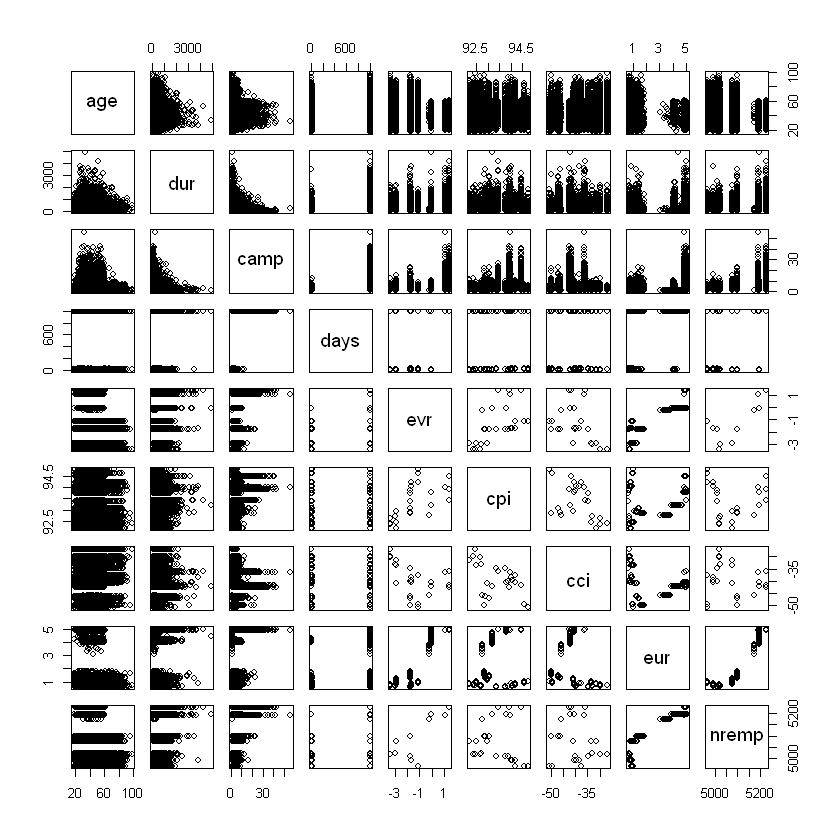

In [7]:
plot(info[,0:9])

In [11]:
C<-cor(info[,0:9])

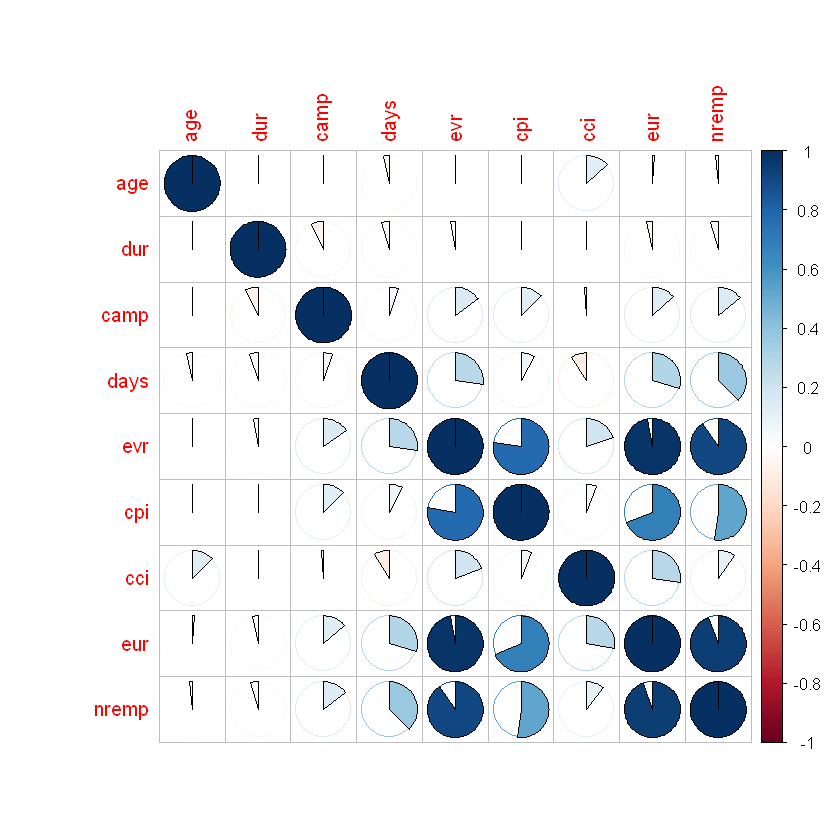

In [17]:
corrplot(C, method="pie")

In [18]:
#Las que tienen un indice de correlacion mas grande en orden descendente

with(info, cor.test(eur,evr))
with(info, cor.test(eur,nremp))
with(info, cor.test(evr,nremp))
with(info, cor.test(evr,cpi))


	Pearson's product-moment correlation

data:  eur and nremp
t = 587.26, df = 41186, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9441146 0.9461754
sample estimates:
      cor 
0.9451544 



	Pearson's product-moment correlation

data:  eur and evr
t = 843.33, df = 41186, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9717110 0.9727684
sample estimates:
      cor 
0.9722447 



	Pearson's product-moment correlation

data:  evr and nremp
t = 437, df = 41186, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9052417 0.9086685
sample estimates:
      cor 
0.9069701 



	Pearson's product-moment correlation

data:  evr and cpi
t = 249.15, df = 41186, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7714531 0.7791575
sample estimates:
      cor 
0.7753342 
